# Multiple Linear Regression on Startups Profits

## Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Summarize the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Descriptive Summary

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Check for any Null Values

In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Check for any Duplicate values

In [6]:
df.duplicated().sum()

0

### Check for outliers

Text(0.5, 1.0, 'Marketing Spend')

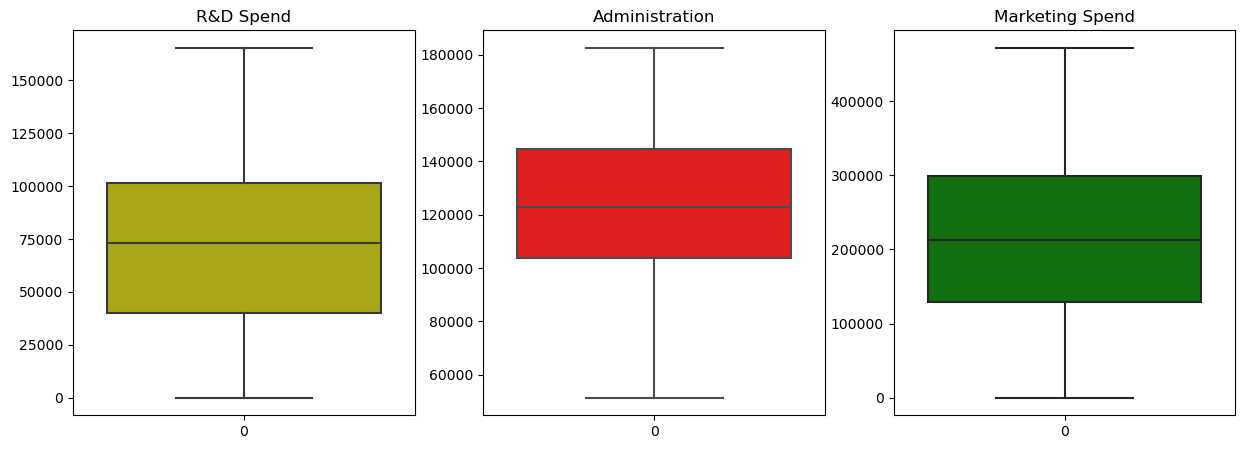

In [7]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.boxplot(df["R&D Spend"],color="y")
plt.title("R&D Spend")
plt.subplot(132)
sns.boxplot(df["Administration"],color="r")
plt.title("Administration")
plt.subplot(133)
sns.boxplot(df["Marketing Spend"],color="g")
plt.title("Marketing Spend")

#### Observation:
- There were no outliers

### Chech the distributions of all three independent features

Text(0.5, 1.0, 'Marketing Spend')

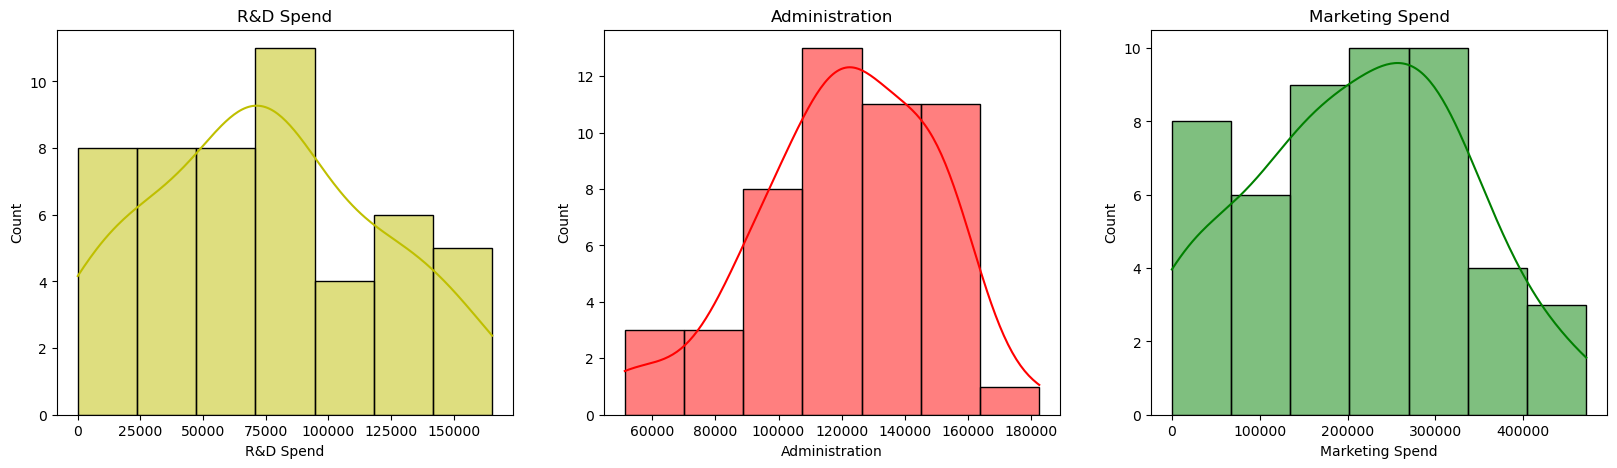

In [8]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
plt.subplot(131)
sns.histplot(df["R&D Spend"],color="y",kde=True)
plt.title("R&D Spend")
plt.subplot(132)
sns.histplot(df["Administration"],color="r",kde=True)
plt.title("Administration")
plt.subplot(133)
sns.histplot(df["Marketing Spend"],color="g",kde=True)
plt.title("Marketing Spend")

#### Observations:
- Administration data is Normally Distributed
- R&D Spend and Marketing Spend are almost Right skewed

### Check the releation of each Independent feature with Dependent feature.

Text(0.5, 1.0, 'Marketing Spend')

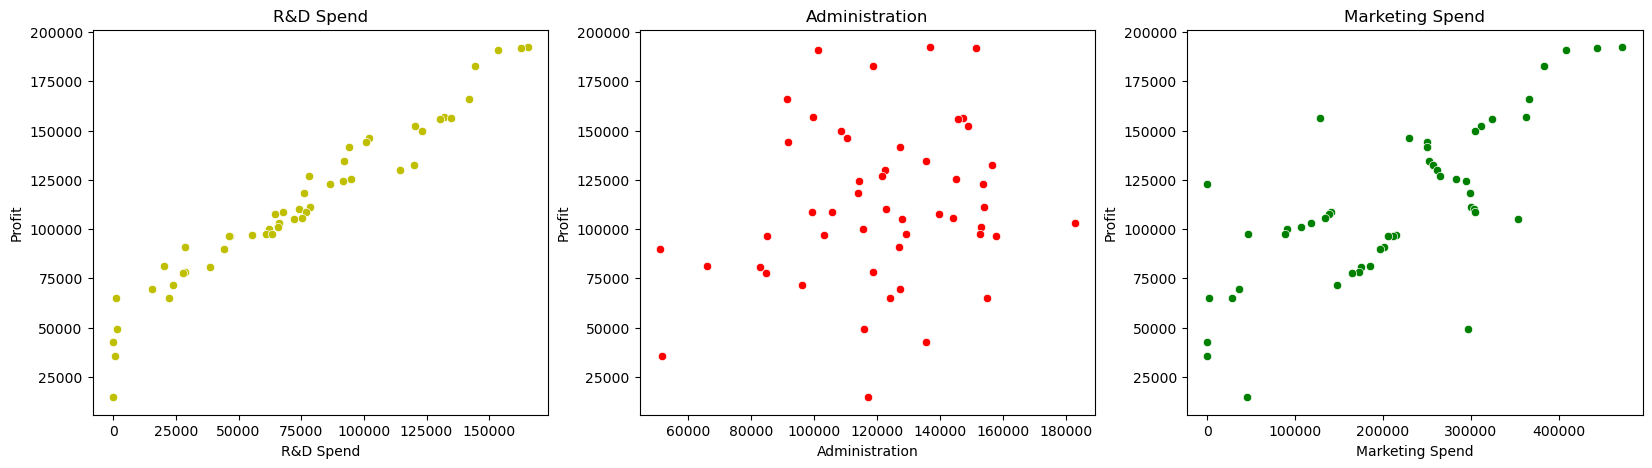

In [9]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
plt.subplot(131)
sns.scatterplot(x=df["R&D Spend"],y=df["Profit"],c="y")
plt.title("R&D Spend")
plt.subplot(132)
sns.scatterplot(x=df["Administration"],y=df["Profit"],c="r")
plt.title("Administration")
plt.subplot(133)
sns.scatterplot(x=df["Marketing Spend"],y=df["Profit"],c="g")
plt.title("Marketing Spend")

#### Observations:
- R&D Spend is completely Linear
- Marketing Spend is also Linear only
- Administration Spend is not Linear

### Let's convert State names into numericals

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label=LabelEncoder()

In [12]:
df["State_Numerical's"]=label.fit_transform(df[["State"]])

In [13]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_Numerical's
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


### Check Coreleation between features:

<AxesSubplot: >

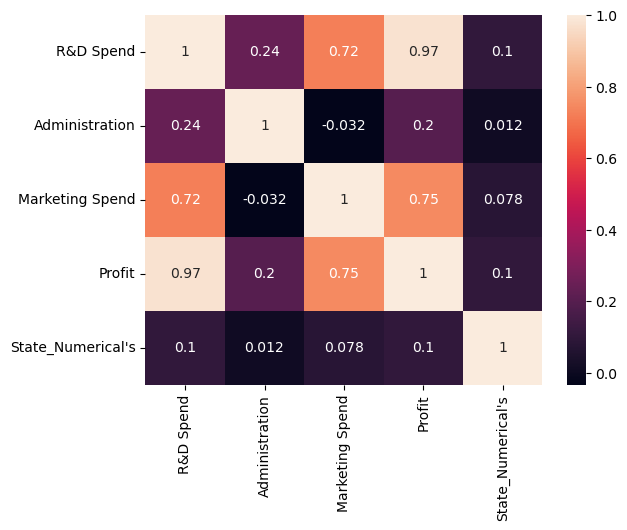

In [14]:
sns.heatmap(df.corr(method="pearson"),annot=True)

#### Observations:
- R&D spend and Marketing spend's will play crucial role in our model training as they have 0.97 and 0.75 Coreleation's with Profit's
- But Administration has a Coreleation of only 0.2. So we even if we don't consider that feature, there won't be any problem
- States also dont have much significance, as it has only 0.1 Coreleation which is almost Zero. So we can Remove that Feature

### Drop Administration and States columns

In [15]:
df.drop(["Administration","State","State_Numerical's"],axis=1,inplace=True)

In [16]:
df.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


### Split the Data

In [17]:
x=df.drop("Profit",axis=1)

In [18]:
x.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [19]:
y=df["Profit"]

In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40, 2), (10, 2), (40,), (10,))

### Define the Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()

In [26]:
model

LinearRegression()

### Fit the model

In [27]:
model.fit(x_train,y_train)

LinearRegression()

### Predict the test Data

In [28]:
y_pred=model.predict(x_test)

In [29]:
y_pred

array([102070.2295162 , 112200.56165334, 134758.09292901,  89937.0460416 ,
       127732.03973848, 128956.92692328,  98293.44749729, 115439.54171866,
        97915.93292932, 152195.40868681])

### Check the cost functions with respect to predictions

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
d={}
d["mse"]=mean_squared_error(y_test,y_pred)
d["mae"]=mean_absolute_error(y_test,y_pred)
d["rmse"]=np.sqrt(mean_squared_error(y_test,y_pred))

In [32]:
d

{'mse': 36136641.65754977, 'mae': 4563.134284218611, 'rmse': 6011.376020309308}

### Check r^2 and Adjusted r^2 Scores

In [33]:
from sklearn.metrics import r2_score

In [34]:
d1={}
r2=r2_score(y_test,y_pred)
d1["r2"]=r2

In [35]:
nminusone=len(x_test)-1
nminuspminus1=(len(x_test)-len(x.columns)-1)

In [36]:
adjusted_r2= 1 - ((1 - r2) * (nminusone) / (nminuspminus1))

In [37]:
d1["adjusted_r2"]=adjusted_r2

In [38]:
d1

{'r2': 0.9116741694785371, 'adjusted_r2': 0.8864382179009762}

### Function to predict given inputs

In [39]:
df.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [46]:
def predict():
    a=float(input("Enter R&D Spend:"))
    b=float(input("Enter R&D Spend:"))
    ans=model.predict([[a,b]])
    print("Your Profit Might be ",ans)

In [47]:
predict()

Enter R&D Spend: 100000
Enter R&D Spend: 120000


Your Profit Might be  [129591.96254231]
